<a href="https://colab.research.google.com/github/educbd/Capstone_Project/blob/main/MIMIC_IV_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIMIC-IV**

**Medical Information Mart for Intensive Care IV** (MIMIC-IV) is a relational database containing real hospital stays for patients admitted to a tertiary academic medical center in Boston, MA, USA. MIMIC-IV contains comprehensive information for each patient while they were in the hospital: laboratory measurements, medications administered, vital signs documented, and so on. The database is intended to support a wide variety of research in healthcare.

---
### Dataset 1: The _diagnosis_ table.
It provides billed diagnoses for patients. Diagnoses are determined after discharge from the emergency department.

In [87]:
import pandas as pd

# The diagnosis table
dx = pd.read_csv("https://github.com/educbd/Capstone_Project/raw/main/diagnosis.csv.gz")

In [88]:
dx.shape

(545, 6)

In [89]:
dx.sample(3)

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
58,10023239,30683757,2,486,9,"PNEUMONIA,ORGANISM UNSPECIFIED"
343,10012853,35933027,1,N390,10,"Urinary tract infection, site not specified"
178,10020740,39169528,2,25000,9,DIABETES UNCOMPL ADULT


---
### Dataset 2: The _edstays_ table.

Is the primary tracking table for emergency department visits. It provides the time the patient entered the emergency department and the time they left the emergency department.

In [90]:
# The edstays table
ed = pd.read_csv("https://github.com/educbd/Capstone_Project/raw/main/edstays.csv.gz")

In [91]:
ed.shape

(222, 9)

In [92]:
ed.sample(3)

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
62,10012853,NaN,39028384,2176-09-09 08:03:00,2176-09-09 13:02:00,F,BLACK/AFRICAN AMERICAN,WALK IN,HOME
154,10015860,24698912.0,31626291,2192-05-11 16:26:00,2192-05-12 09:31:00,M,WHITE,AMBULANCE,ADMITTED
168,10020740,NaN,38233644,2151-01-25 11:39:00,2151-01-26 01:07:00,M,WHITE,AMBULANCE,HOME


---
### Dataset 3: The _medrecon_ table.

On admission to the emergency departments, staff will ask the patient what current medications they are taking. This process is called **medicine reconciliation**, and the medrecon table stores the findings of the care providers.

In [93]:
# The medrecon table
md = pd.read_csv('https://github.com/educbd/Capstone_Project/raw/main/medrecon.csv.gz')

In [94]:
md.shape

(2764, 9)

In [95]:
md.sample(3)

,subject_id,stay_id,charttime,name,gsn,ndc,etc_rn,etccode,etcdescription
2263,10020306,36021274,2135-01-15 18:01:00,"pen needle, diabetic [BD Ultra-Fine Nano Pen N...",66308,15482023432,2,5904.0,"Medical Supply, FDB Superset"
2456,10014354,36250263,2148-05-10 22:25:00,levothyroxine,66133,24090049177,1,6081.0,Thyroid Hormones - Synthetic T4 (Thyroxine)
2490,10037928,32443787,2178-12-21 04:37:00,insulin lispro [Humalog KwikPen],34731,66733082201,1,6089.0,Insulin Analogs - Rapid Acting


---
### Dataset 4: The _pyxis_ table.

Provides information for medicine dispensations made via the Pyxis system.

In [96]:
# The pyxis table
py = pd.read_csv('https://github.com/educbd/Capstone_Project/raw/main/pyxis.csv.gz')

In [97]:
py.shape

(1082, 7)

In [98]:
py.sample(3)

,subject_id,stay_id,charttime,med_rn,name,gsn_rn,gsn
326,10002930,31579293,2196-04-14 08:18:00,3,Dextrose 50%,1,1989.0
129,10039708,38488295,2144-01-18 19:45:00,10,Lactulose,3,68217.0
341,10021487,37714209,2117-10-25 21:35:00,5,Acetaminophen,1,4489.0


---
### Dataset 5: The _triage_ table.

Contains information about the patient when they were first triaged in the emergency department. Patients are assessed at triage by a single care provider and asked a series of questions to assess their current health status. Their vital signs are measured and a level of acuity is assigned. Based on the level of acuity, the patient either waits in the waiting room for later attention, or is prioritized for immediate care.

In [99]:
tr = pd.read_csv('https://github.com/educbd/Capstone_Project/raw/main/triage.csv.gz')

In [100]:
tr.shape

(222, 11)

In [101]:
tr.sample(3)

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
212,10039997,31764136,96.5,112.0,20.0,100.0,124.0,50.0,0,3.0,"Depression, Anxiety"
183,10040025,32034003,98.0,66.0,16.0,96.0,154.0,47.0,5,3.0,HYPERTENSION
221,10037928,35156583,97.8,75.0,16.0,95.0,159.0,60.0,6,3.0,Back pain


---
### Dataset 6: The _vitalsign_ table.

Patients admitted to the emergency department have routine vital signs taken ever 1-4 hours.

In [102]:
vs = pd.read_csv('https://github.com/educbd/Capstone_Project/raw/main/vitalsign.csv.gz')

In [103]:
vs.shape

(1038, 11)

In [104]:
vs.sample(3)

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
671,10012853,33256413,2176-08-11 17:33:00,97.9,65.0,16.0,93.0,124.0,45.0,NaN,0
737,10019777,30952335,2187-02-10 15:58:00,NaN,93.0,16.0,100.0,111.0,75.0,NaN,NaN
187,10005866,35681380,2149-06-20 13:00:00,98.1,65.0,18.0,99.0,133.0,90.0,NaN,NaN


---
Now we can merge all 6 dataset into a single one:

In [105]:
merged_df = dx.merge(ed, on=['subject_id', 'stay_id'], how='outer')
merged_df = merged_df.merge(md, on=['subject_id', 'stay_id'], how='outer')
merged_df = merged_df.merge(py, on=['subject_id', 'stay_id'], how='outer')
merged_df = merged_df.merge(tr, on=['subject_id', 'stay_id'], how='outer')
df = merged_df.merge(vs, on=['subject_id', 'stay_id'], how='outer')

In [106]:
# All the merged data
df.head(5)

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,hadm_id,intime,outtime,gender,...,chiefcomplaint,charttime,temperature_y,heartrate_y,resprate_y,o2sat_y,sbp_y,dbp_y,rhythm,pain_y
0,10025463,35470228,1.0,431,9.0,INTRACEREBRAL HEMORRHAGE,24470193.0,2137-10-08 18:16:00,2137-10-08 21:20:50,M,...,HEAD BLEED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10025463,35470228,1.0,431,9.0,INTRACEREBRAL HEMORRHAGE,24470193.0,2137-10-08 18:16:00,2137-10-08 21:20:50,M,...,HEAD BLEED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10025463,35470228,1.0,431,9.0,INTRACEREBRAL HEMORRHAGE,24470193.0,2137-10-08 18:16:00,2137-10-08 21:20:50,M,...,HEAD BLEED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10027602,36678718,1.0,431,9.0,INTRACEREBRAL HEMORRHAGE,28166872.0,2201-10-30 10:48:00,2201-10-30 12:25:00,F,...,HEAD BLEED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009049,31628990,1.0,486,9.0,"PNEUMONIA,ORGANISM UNSPECIFIED",22995465.0,2174-05-26 04:20:00,2174-05-26 09:18:00,M,...,Chest pain,2174-05-26 05:31:00,104.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

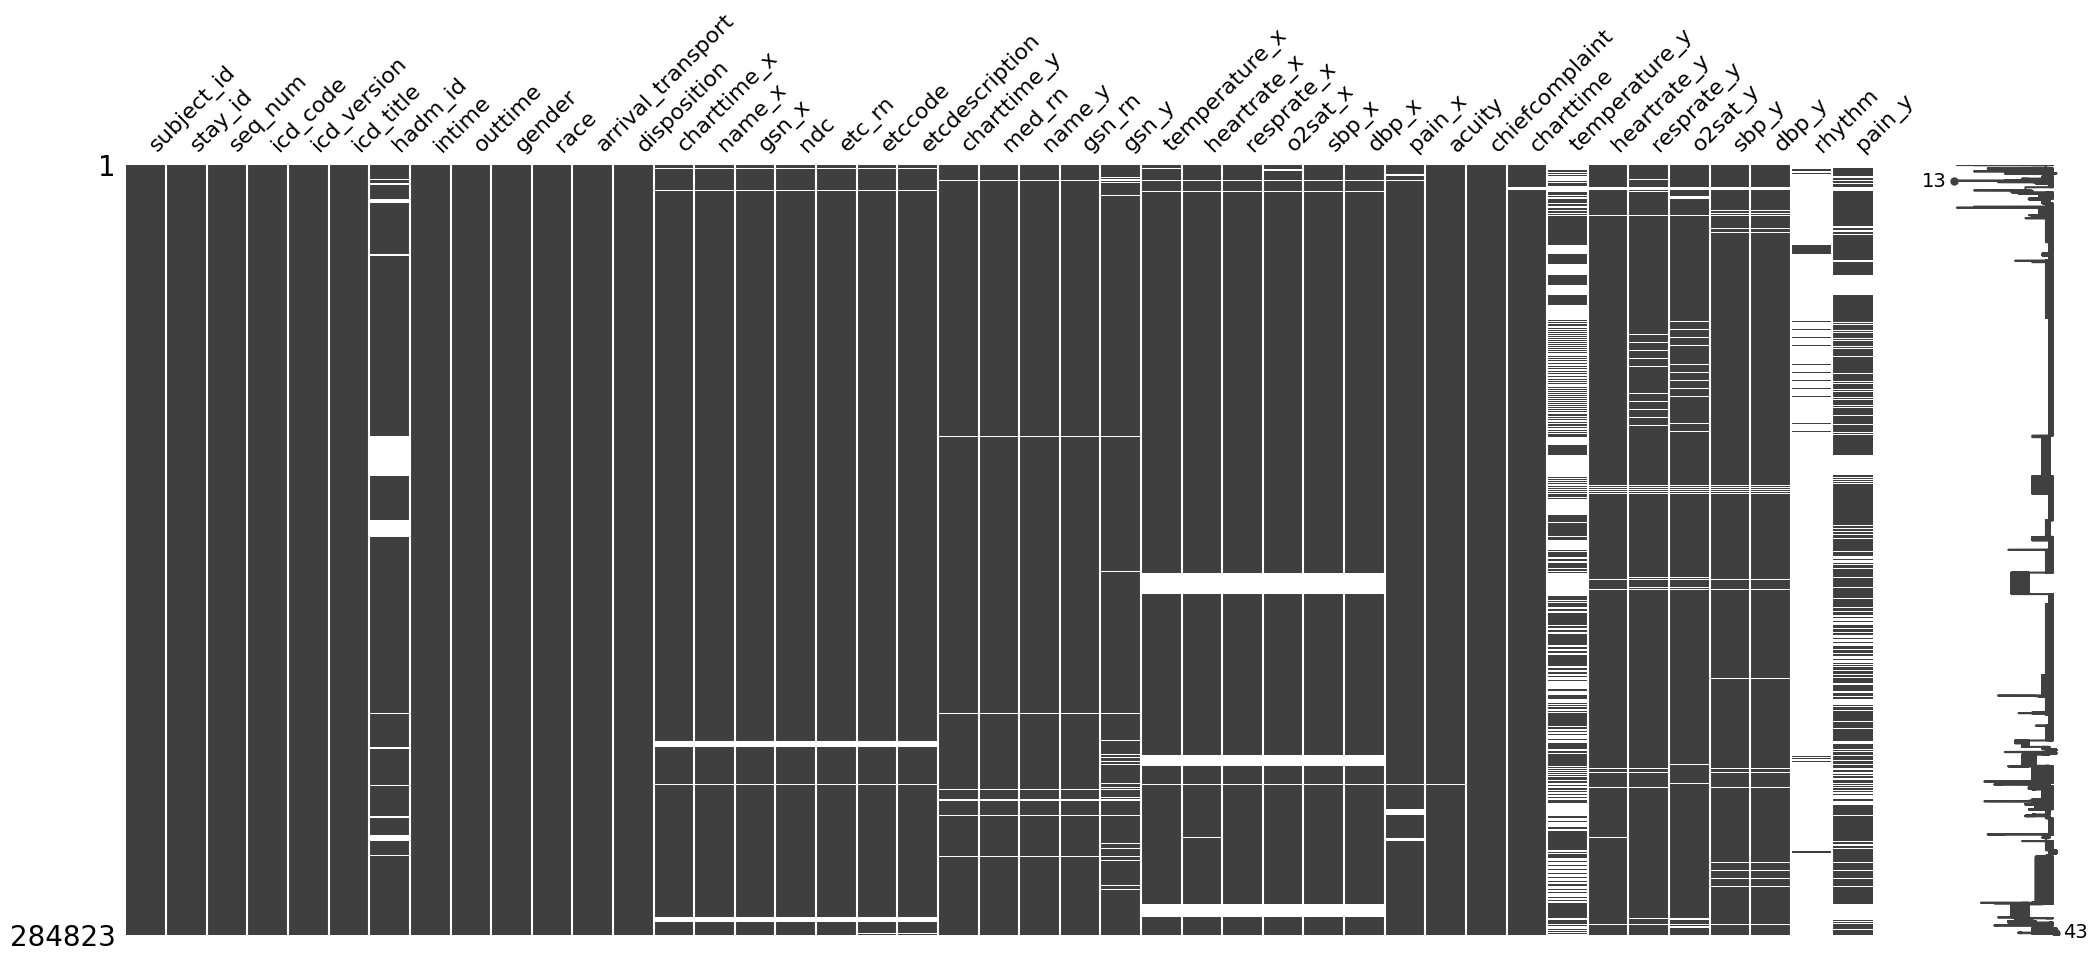

In [107]:
import missingno as msno
msno.matrix(df)